In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pprint

In [3]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [4]:
# Load the breast cancer dataset
cancer_data = load_breast_cancer()

# The target array contains the labels: 0 for malignant, 1 for benign
labels = cancer_data.target

# Compute the base rate of malignant cancer occurrence
# Malignant cancer is labeled as 0
malignant_count = np.sum(labels == 0)
total_count = len(labels)

base_rate_malignant = malignant_count / total_count
print(f"Base Rate of Malignant Cancer: {base_rate_malignant * 100:.2f}%")

Base Rate of Malignant Cancer: 37.26%


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a)
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


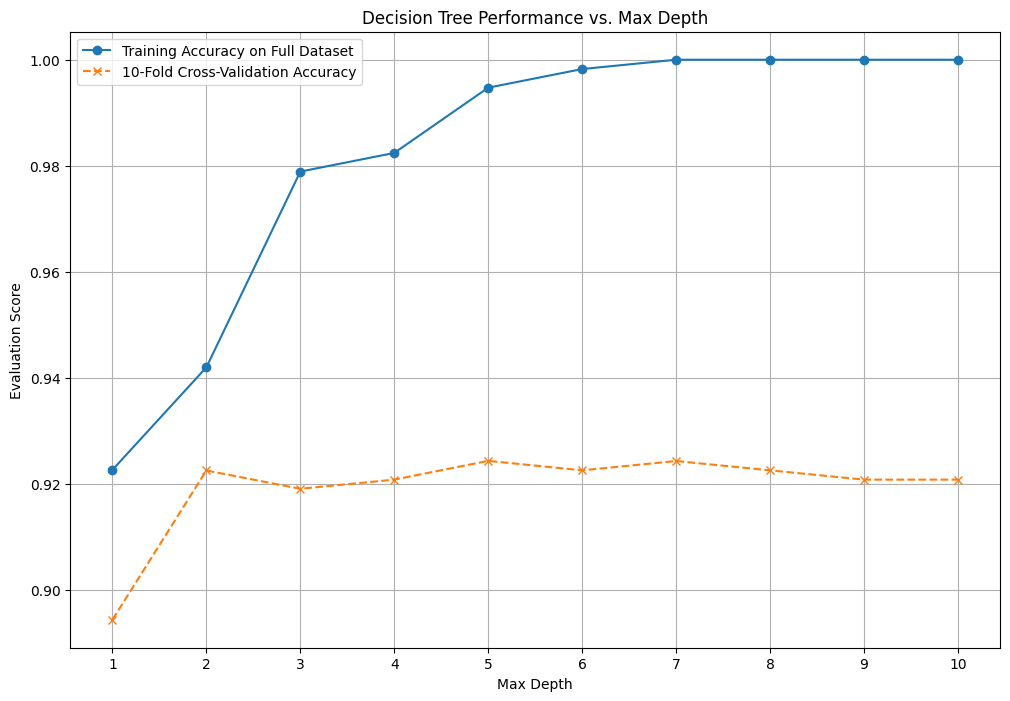


--- Performance Results ---
Max Depth: 1
  Training Accuracy: 0.9227
  10-Fold CV Accuracy: 0.8944
------------------------------
Max Depth: 2
  Training Accuracy: 0.9420
  10-Fold CV Accuracy: 0.9226
------------------------------
Max Depth: 3
  Training Accuracy: 0.9789
  10-Fold CV Accuracy: 0.9191
------------------------------
Max Depth: 4
  Training Accuracy: 0.9824
  10-Fold CV Accuracy: 0.9208
------------------------------
Max Depth: 5
  Training Accuracy: 0.9947
  10-Fold CV Accuracy: 0.9244
------------------------------
Max Depth: 6
  Training Accuracy: 0.9982
  10-Fold CV Accuracy: 0.9226
------------------------------
Max Depth: 7
  Training Accuracy: 1.0000
  10-Fold CV Accuracy: 0.9243
------------------------------
Max Depth: 8
  Training Accuracy: 1.0000
  10-Fold CV Accuracy: 0.9226
------------------------------
Max Depth: 9
  Training Accuracy: 1.0000
  10-Fold CV Accuracy: 0.9208
------------------------------
Max Depth: 10
  Training Accuracy: 1.0000
  10-Fold C

In [12]:
X = cancer_data.data
y = cancer_data.target

max_depth_values = range(1, 11)  # max_depth from 1 to 10
train_accuracies = []
cv_accuracies = []

for depth in max_depth_values:
    # Initialize Decision Tree Classifier with current max_depth and random_state
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)

    # 1. Accuracy when training and testing on the full dataset
    dtree.fit(X, y)
    y_pred_train = dtree.predict(X)
    train_accuracy = accuracy_score(y, y_pred_train)
    train_accuracies.append(train_accuracy)

    # 2. 10-fold cross-validated accuracy
    # KFold ensures consistency for cross-validation splitting
    kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    cv_score = cross_val_score(dtree, X, y, cv=kf, scoring='accuracy')
    cv_accuracies.append(np.mean(cv_score)) # Store the mean of the 10 folds


# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depth_values, train_accuracies, marker='o', linestyle='-', label='Training Accuracy on Full Dataset')
plt.plot(max_depth_values, cv_accuracies, marker='x', linestyle='--', label='10-Fold Cross-Validation Accuracy')

plt.title('Decision Tree Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Evaluation Score')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Performance Results ---")
for i, depth in enumerate(max_depth_values):
    print(f"Max Depth: {depth}")
    print(f"  Training Accuracy: {train_accuracies[i]:.4f}")
    print(f"  10-Fold CV Accuracy: {cv_accuracies[i]:.4f}")
    print("-" * 30)

### (b)
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.



#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**The best accuracy using full-dataset is 1 or 100%. It was achieved on the max_depth 7,8,9 and 10.**

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**The best accuracy for 10 fold cross-vaidation is 0.9244 or 92.44 percent and it was achieved on the max_depth of 5**



## 3\.
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a)
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

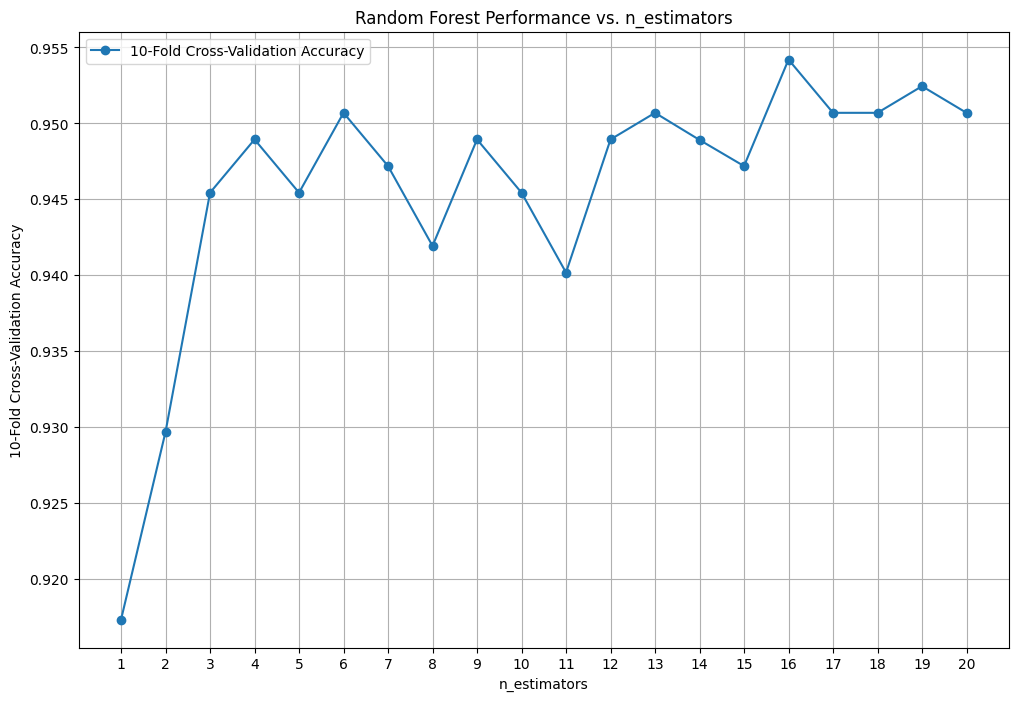

In [ ]:
from sklearn.ensemble import RandomForestClassifier
best_max_depth = 5
n_estimators_values = range(1, 21)
cv_accuracies = []

for n_estimators in n_estimators_values:
    # Initialize Random Forest Classifier with current n_estimators and best_max_depth
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_max_depth, random_state=RANDOM_STATE)

    kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
    cv_score = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
    mean_cv_accuracy = np.mean(cv_score)
    cv_accuracies.append(mean_cv_accuracy)

    #print(f"n_estimators: {n_estimators:} | 10-Fold CV Accuracy: {mean_cv_accuracy:.4f}")

    # Plotting the results
plt.figure(figsize=FIGSIZE)
plt.plot(n_estimators_values, cv_accuracies, marker='o', linestyle='-', label='10-Fold Cross-Validation Accuracy')

plt.title('Random Forest Performance vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('10-Fold Cross-Validation Accuracy')
plt.xticks(n_estimators_values)
plt.legend()
plt.grid(True)
plt.show()

### (b)
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Yes, using random forest yeilds better accuracy of 0.9649 as compared to single decision tree which gave accuracy 0.9244** .

### (c)
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated accuracy?

**Best accuracy was achieved with the n_estimators setting of 16.**

### (d)
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

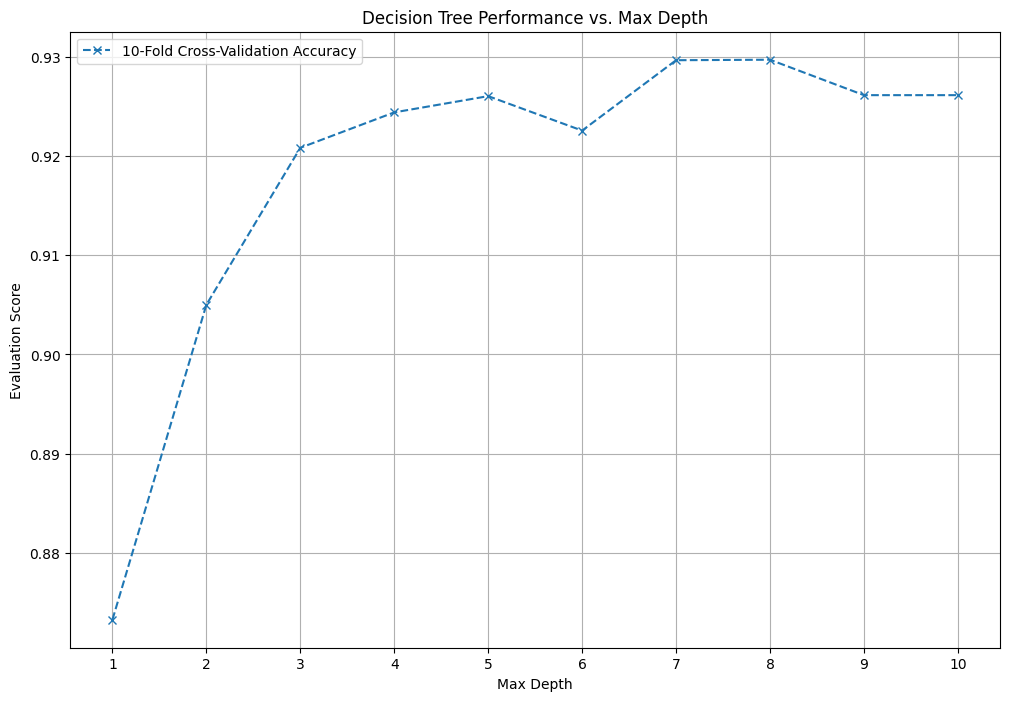


--- Performance Results ---
Max Depth: 1
  Training Accuracy: 0.9227
  10-Fold CV Accuracy: 0.8733
------------------------------
Max Depth: 2
  Training Accuracy: 0.9420
  10-Fold CV Accuracy: 0.9050
------------------------------
Max Depth: 3
  Training Accuracy: 0.9789
  10-Fold CV Accuracy: 0.9208
------------------------------
Max Depth: 4
  Training Accuracy: 0.9824
  10-Fold CV Accuracy: 0.9244
------------------------------
Max Depth: 5
  Training Accuracy: 0.9947
  10-Fold CV Accuracy: 0.9260
------------------------------
Max Depth: 6
  Training Accuracy: 0.9982
  10-Fold CV Accuracy: 0.9226
------------------------------
Max Depth: 7
  Training Accuracy: 1.0000
  10-Fold CV Accuracy: 0.9297
------------------------------
Max Depth: 8
  Training Accuracy: 1.0000
  10-Fold CV Accuracy: 0.9297
------------------------------
Max Depth: 9
  Training Accuracy: 1.0000
  10-Fold CV Accuracy: 0.9261
------------------------------
Max Depth: 10
  Training Accuracy: 1.0000
  10-Fold C

In [9]:
from sklearn.ensemble import RandomForestClassifier
n_estimators =  16
X = cancer_data.data
y = cancer_data.target

max_depth_values = range(1, 11)  # max_depth from 1 to 10
train_accuracies = []
cv_accuracies = []

for depth in max_depth_values:
    # Initialize Decision Tree Classifier with current max_depth and random_state
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)

    # 1. Accuracy when training and testing on the full dataset
    dtree.fit(X, y)
    y_pred_train = dtree.predict(X)
    train_accuracy = accuracy_score(y, y_pred_train)
    train_accuracies.append(train_accuracy)

    # 2. 10-fold cross-validated accuracy
    # KFold ensures consistency for cross-validation splitting
    kf = KFold(n_splits=n_estimators, shuffle=True, random_state=RANDOM_STATE)
    cv_score = cross_val_score(dtree, X, y, cv=kf, scoring='accuracy')
    cv_accuracies.append(np.mean(cv_score)) # Store the mean of the 10 folds


# Plotting the results
plt.figure(figsize=FIGSIZE)
#plt.plot(max_depth_values, train_accuracies, marker='o', linestyle='-', label='Training Accuracy on Full Dataset')
plt.plot(max_depth_values, cv_accuracies, marker='x', linestyle='--', label='10-Fold Cross-Validation Accuracy')

plt.title('Decision Tree Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Evaluation Score')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Performance Results ---")
for i, depth in enumerate(max_depth_values):
    print(f"Max Depth: {depth}")
    print(f"  Training Accuracy: {train_accuracies[i]:.4f}")
    print(f"  10-Fold CV Accuracy: {cv_accuracies[i]:.4f}")
    print("-" * 30)

### (e)
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**No, it is not same as in 2bii, The optimat max_depth for 10 fold CV accuracy is now at max_depth 7 and 8 and it is .9297 or 92.97%**

## 4\.
For this last question, we will explore the dependability of our estimates.
### (a)
Make a plot using the following procedure:
#### i.
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii.
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

Starting cross-validation for different random states and max depths...
Random State 0: Best max_depth(s) = [7] with accuracy = 0.9351
Random State 1: Best max_depth(s) = [4, 7] with accuracy = 0.9402
Random State 2: Best max_depth(s) = [6] with accuracy = 0.9367
Random State 3: Best max_depth(s) = [2, 5] with accuracy = 0.9297
Random State 4: Best max_depth(s) = [6] with accuracy = 0.9350
Random State 5: Best max_depth(s) = [6] with accuracy = 0.9313
Random State 6: Best max_depth(s) = [6] with accuracy = 0.9438
Random State 7: Best max_depth(s) = [6] with accuracy = 0.9386
Random State 8: Best max_depth(s) = [6] with accuracy = 0.9385
Random State 9: Best max_depth(s) = [4] with accuracy = 0.9439
Random State 10: Best max_depth(s) = [5] with accuracy = 0.9244
Random State 11: Best max_depth(s) = [5] with accuracy = 0.9385
Random State 12: Best max_depth(s) = [5] with accuracy = 0.9402
Random State 13: Best max_depth(s) = [2] with accuracy = 0.9297
Random State 14: Best max_depth(s) =

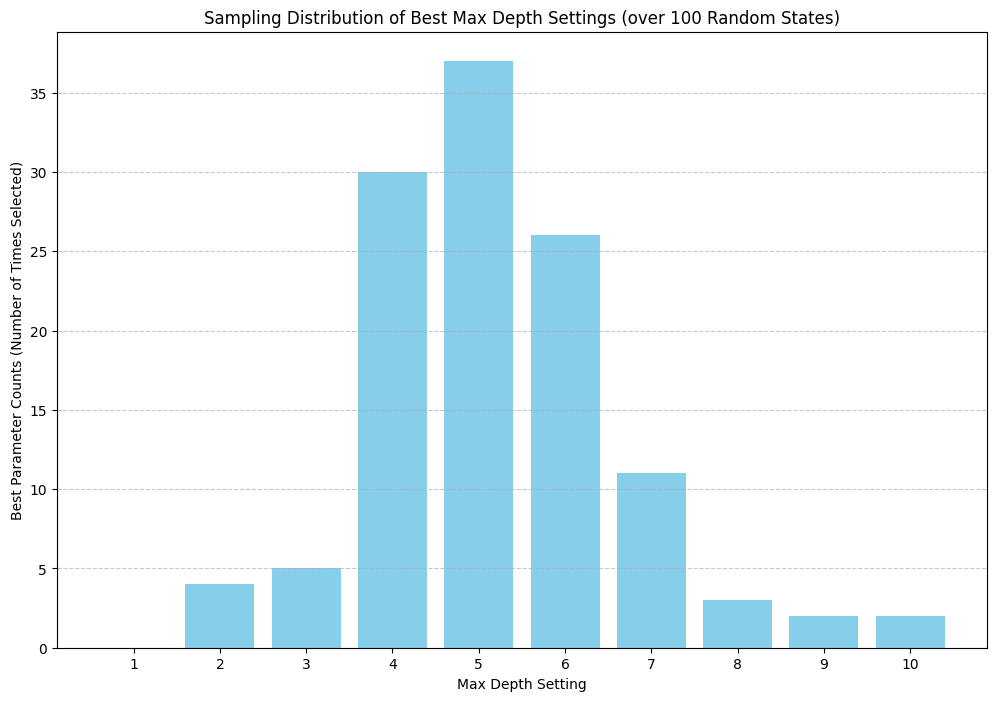


Plot displayed successfully.


In [17]:
# --- Define parameters ---
random_state_values = range(100) # Random state values from 0 to 99
max_depth_values = range(1, 11)   # Max depth settings from 1 to 10
#FIGSIZE = (12,8) # Standard figure size

# List to store the best max_depth(s) for each random_state
# We store a list for each random_state to handle ties in best accuracy
all_best_max_depth_selections = []

print("Starting cross-validation for different random states and max depths...")

# Loop through each random_state
for rs in random_state_values:
    # Initialize variables to track the best accuracy and corresponding max_depth(s) for the current random_state
    best_accuracy_for_rs = -1.0 # Initialize with a very low accuracy
    current_best_depths = [] # To store max_depths that achieve this best accuracy

    # Loop through each max_depth
    for depth in max_depth_values:
        # Initialize Decision Tree Classifier with current max_depth and random_state
        # The random_state here affects the internal randomness of the tree, e.g., for feature selection
        dt = DecisionTreeClassifier(max_depth=depth, random_state=rs)

        # Initialize KFold for 10-fold cross-validation
        # It's important to shuffle and set random_state for reproducibility of the splits
        kf = KFold(n_splits=10, shuffle=True, random_state=rs)

        # Calculate 10-fold cross-validation scores
        cv_scores = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')

        # Calculate the mean cross-validation accuracy for this combination
        mean_cv_accuracy = np.mean(cv_scores)

        # Check if this max_depth yields a new best accuracy or ties with the current best
        if mean_cv_accuracy > best_accuracy_for_rs:
            best_accuracy_for_rs = mean_cv_accuracy
            current_best_depths = [depth] # Start a new list for the new best accuracy
        elif mean_cv_accuracy == best_accuracy_for_rs:
            current_best_depths.append(depth) # Add to the list if it's a tie

    # After checking all max_depths for the current random_state,
    # add all best performing depths to our main list
    all_best_max_depth_selections.extend(current_best_depths)
    print(f"Random State {rs}: Best max_depth(s) = {current_best_depths} with accuracy = {best_accuracy_for_rs:.4f}")

print("\nCross-validation complete. Preparing to plot...")

# Count the occurrences of each best max_depth setting
# Counter will correctly handle cases where multiple depths tied for best accuracy in a single random_state
depth_counts = Counter(all_best_max_depth_selections)

# Extract max_depth values and their counts for plotting
# Ensure all max_depths from 1 to 10 are represented, even if their count is 0
plot_depths = sorted(list(set(max_depth_values).union(depth_counts.keys())))
plot_counts = [depth_counts.get(d, 0) for d in plot_depths]

# --- Plotting the results as a bar chart ---
plt.figure(figsize=FIGSIZE)
plt.bar(plot_depths, plot_counts, color='skyblue')

plt.title('Sampling Distribution of Best Max Depth Settings (over 100 Random States)')
plt.xlabel('Max Depth Setting')
plt.ylabel('Best Parameter Counts (Number of Times Selected)')
plt.xticks(plot_depths) # Ensure all max_depth values are shown on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nPlot displayed successfully.")

### (b)
What are the top two most frequent parameter settings?

**The top two most frequent parameter settings for max_depth are: max_depth = 5 (selected 37 times) and max_depth = 4 (selected 30 times)**
